In [15]:
#Feature Engineering 
#Histogram of Gradients
import pathlib
import numpy as np
import cv2
import imageio

In [16]:
training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[45]
print(str(im_path))
training_sorted
training_paths

../input/stage1_train/10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28/images/10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28.png


<generator object glob at 0x7f625b210fa0>

In [19]:
im = cv2.imread(str(im_path))
print(im.shape)
# im = imageio.imread(str(im_path))
# im.shape

(520, 696, 3)


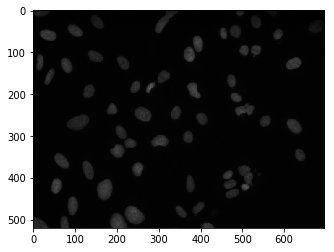

In [21]:
import matplotlib.pyplot as plt

plt.imshow(im)

In [22]:
im = np.float32(im) / 255.0

In [25]:
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)

In [26]:
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

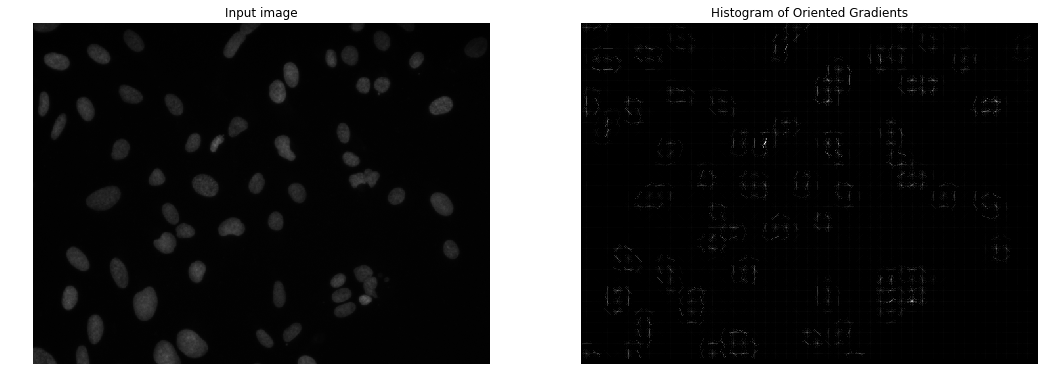

In [70]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from skimage.color import rgb2gray


image=cv2.imread(str(im_path))

im_gray = rgb2gray(image)


fd, hog_image = hog(im_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box-forced')
plt.show()

In [85]:
from skimage import data
from skimage.transform import rotate

image=cv2.imread(str(im_path))

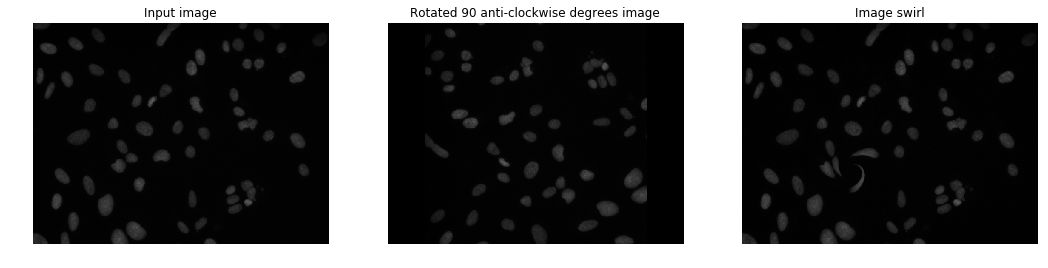

In [117]:
rotate(image, 2).shape

image_r=rotate(image,90)
image_s=swirl(image,radius=100,strength=10,order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8), sharex=True, sharey=True)


ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')


ax2.axis('off')
ax2.imshow(image_r,cmap=plt.cm.gray)
ax2.set_title('Rotated 90 anti-clockwise degrees image')
ax2.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(image_s,cmap=plt.cm.gray)
ax3.set_title('Image swirl')
ax3.set_adjustable('box-forced')

In [102]:
from skimage.transform import swirl

In [104]:
swirl(image).shape

(520, 696, 3)

In [ ]:
#keras preprocessing